In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [4]:
file_name = "GOOGL"
dataset=pd.read_csv(file_name+".csv")
print(dataset.head(5))



         Date       High        Low  ...      Volume  Adj Close  Ticker
0  2004-08-19  52.082081  48.028027  ...  44659000.0  50.220219   GOOGL
1  2004-08-20  54.594593  50.300301  ...  22834300.0  54.209209   GOOGL
2  2004-08-23  56.796795  54.579578  ...  18256100.0  54.754753   GOOGL
3  2004-08-24  55.855854  51.836838  ...  15247300.0  52.487488   GOOGL
4  2004-08-25  54.054054  51.991993  ...   9188600.0  53.053055   GOOGL

[5 rows x 8 columns]


[[0.00151008]
 [0.00477758]
 [0.00764153]
 ...
 [0.9967748 ]
 [1.        ]
 [0.99302938]]
Epoch 1/20
94/94 [==============================] - 1s 14ms/step - loss: 0.0127
Epoch 2/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 3/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 4/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0027
Epoch 5/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 6/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 7/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 8/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0021
Epoch 9/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 10/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 11/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 12/20
94/94 [=========

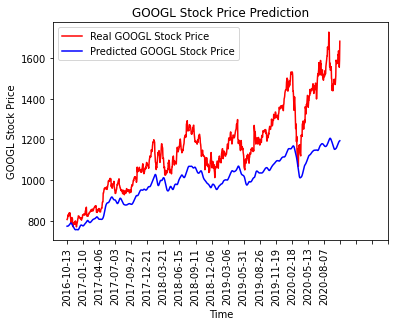

In [5]:
training_size = int(len(dataset) * 0.75)
test_size = len(dataset) - training_size

training_set, test_set = dataset.iloc[0:training_size,1:2].values, dataset.iloc[training_size:,1:2].values


sc = MinMaxScaler(feature_range = (0, 1))
trainingset_scaled = sc.fit_transform(training_set)
print(trainingset_scaled)

xtrain = []
ytrain = []
for i in range(60, len(training_set)):
    xtrain.append(trainingset_scaled[i-60:i, 0])
    ytrain.append(trainingset_scaled[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))

lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

lstm_model.fit(xtrain, ytrain, epochs = 20, batch_size = 32)
lstm_model.save('google_model')
dataset_train = dataset.iloc[:training_size, 1:2]
dataset_test = dataset.iloc[training_size:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs)
xtest = []
for i in range(60, len(test_set)+60):
    xtest.append(inputs[i-60:i, 0])
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
print(xtest.shape)

predicted_values = lstm_model.predict(xtest)
predicted_values = sc.inverse_transform(predicted_values)
print(len(predicted_values))
print(len(dataset_test.values))
plt.plot(dataset.loc[training_size:, "Date"],dataset_test.values, color = "red", label = "Real {} Stock Price".format(file_name))
plt.plot(dataset.loc[training_size:, "Date"],predicted_values, color = "blue", label = "Predicted {} Stock Price".format(file_name))
plt.xticks(np.arange(0,1251,60),rotation='vertical')
plt.title('{} Stock Price Prediction'.format(file_name))
plt.xlabel('Time')
plt.ylabel('{} Stock Price'.format(file_name))
plt.legend()
plt.show()


In [6]:
d1 = list(dataset['Date'][training_size:])

In [7]:
predicted_values = list(predicted_values.flatten())

In [8]:
test_set = list(test_set.flatten())

In [9]:
df = pd.DataFrame(test_set,predicted_values)

In [10]:
mydf = pd.DataFrame((zip(test_set, predicted_values,d1)), columns = ['test_set', 'predicted_values','Date'])

In [11]:
mydf.head(10)

,test_set,predicted_values,Date
0,806.559998,773.646118,2016-10-13
1,810.090027,773.875854,2016-10-14
2,813.489990,774.140930,2016-10-17
3,828.809998,774.417969,2016-10-18
4,829.799988,774.863892,2016-10-19
5,828.469971,775.612610,2016-10-20
6,824.289978,776.698914,2016-10-21
7,837.940002,778.032410,2016-10-24
8,838.500000,779.627319,2016-10-25
9,827.710022,781.472534,2016-10-26


In [12]:
mydf.tail(10)

,test_set,predicted_values,Date
1010,1583.930054,1171.042725,2020-10-19
1011,1573.839966,1174.717651,2020-10-20
1012,1615.140015,1178.005493,2020-10-21
1013,1613.420044,1180.976074,2020-10-22
1014,1634.119995,1183.680908,2020-10-23
1015,1629.579956,1186.229980,2020-10-26
1016,1602.000000,1188.640747,2020-10-27
1017,1553.810059,1190.745239,2020-10-28
1018,1588.739990,1192.189453,2020-10-29
1019,1681.319946,1192.961426,2020-10-30


In [13]:
mydf.to_csv('predictions.csv',index = None)